# PROYECTO MODULO 2

## Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
from statsmodels.stats.proportion import proportions_ztest

## Abrir el archivo y leer la información general

In [2]:
data = pd.read_csv('Data/logs_exp_us.csv', sep="\t")

In [3]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


## Preparar los datos para el analisis

In [4]:
## Cambiar el nombre de las columnas
data.columns = ['Evento','Id_usuario','Evento_ts','Id_exp']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Evento      244126 non-null  object
 1   Id_usuario  244126 non-null  int64 
 2   Evento_ts   244126 non-null  int64 
 3   Id_exp      244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
data['Evento_ts'] = pd.to_datetime(data['Evento_ts'], unit='s')

data['Evento_fecha'] = data['Evento_ts'].dt.date

In [7]:
data.head()

,Evento,Id_usuario,Evento_ts,Id_exp,Evento_fecha
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [8]:
print('Valores ausentes en Evento:',data['Evento'].isna().sum())
print('Valores ausentes en usuarios:',data['Id_usuario'].isna().sum())
print('Valores ausentes en fecha-hora de evento:',data['Evento_ts'].isna().sum())
print('Valores ausentes en experimento:',data['Evento_ts'].isna().sum())

Valores ausentes en Evento: 0
Valores ausentes en usuarios: 0
Valores ausentes en fecha-hora de evento: 0
Valores ausentes en experimento: 0


_Se realizaron pruebas con los datos y modificaciones para su correcta manipulacion_

## Estudiar y comprobar datos

In [9]:
num_eventos = data['Evento'].nunique()
print(f'Hay {num_eventos} cantidad(es) de evento(s) distintos')

num_usuarios = data['Id_usuario'].nunique()
print(f'Hay {num_usuarios} cantidad(es) de usuario(s) distintos')

Hay 5 cantidad(es) de evento(s) distintos
Hay 7551 cantidad(es) de usuario(s) distintos


In [10]:
prom_eventxuser = data.shape[0] / num_usuarios
print(f'El promedio de eventos por usuario es: {prom_eventxuser}')

El promedio de eventos por usuario es: 32.33028737915508


In [11]:
fecha_max = data['Evento_fecha'].max()
fecha_min = data['Evento_fecha'].min()

print(f'El dataset cubre fechas desde el {fecha_min}, hasta el {fecha_max}')

El dataset cubre fechas desde el 2019-07-25, hasta el 2019-08-07


### Histograma de datos

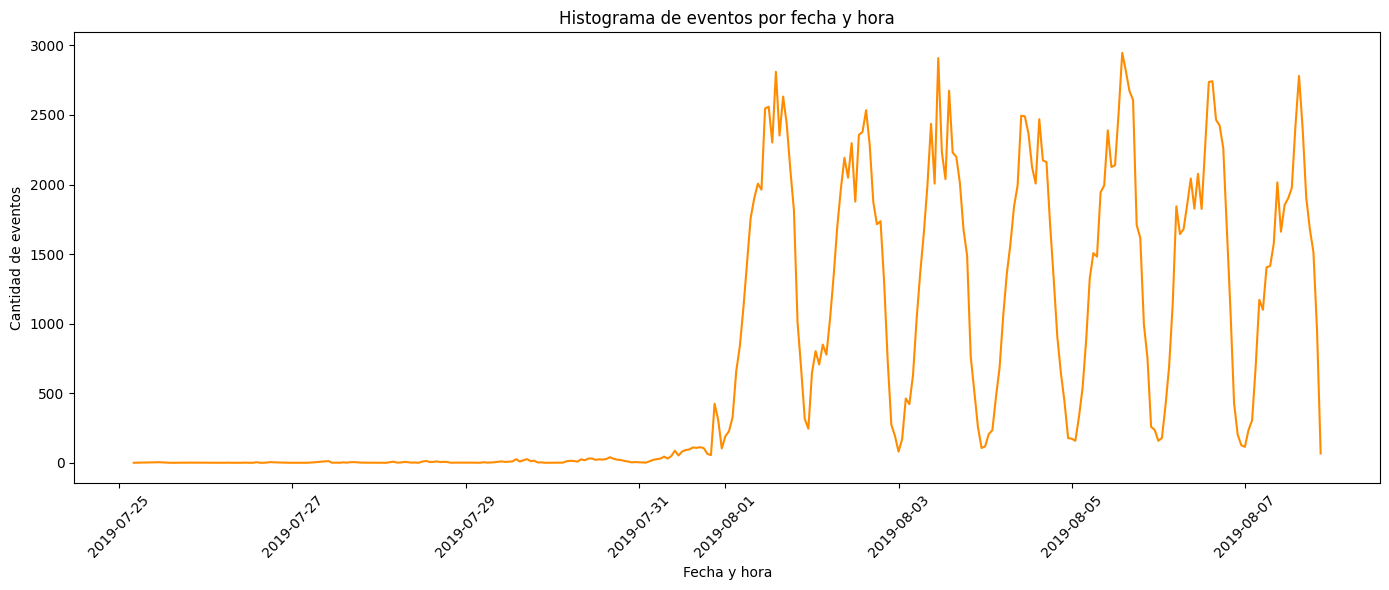

In [12]:
data['fecha_hora'] = data['Evento_ts'].dt.floor('H')

# Contar eventos por fecha y hora
eventos_por_hora = data['fecha_hora'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(eventos_por_hora.index, eventos_por_hora.values, color='darkorange')
plt.xticks(rotation=46)
plt.xlabel('Fecha y hora')
plt.ylabel('Cantidad de eventos')
plt.title('Histograma de eventos por fecha y hora')
plt.tight_layout()
plt.show()

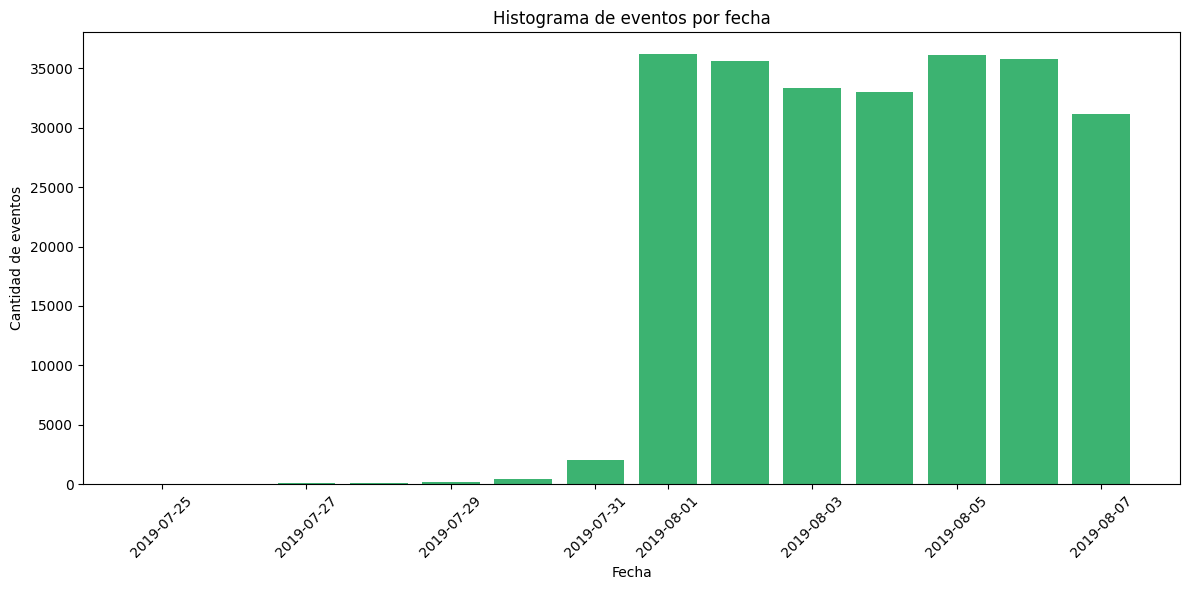

In [13]:
eventos_por_fecha = data['Evento_fecha'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(eventos_por_fecha.index, eventos_por_fecha.values, color='mediumseagreen')
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de eventos')
plt.title('Histograma de eventos por fecha')
plt.tight_layout()
plt.show()

_Podemos observar que los datos en mayores cantidades se encuentran a partir del primero de agosto, al 7 de agosto_

_Del día 25 de septiembre al 31 de septiembre la cantidas es muy inferior, por lo que podrían entorpecer la investigación_

In [14]:
print(data[data['Evento_fecha'] < pd.to_datetime('2019-08-01')])

                       Evento           Id_usuario           Evento_ts  \
0            MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1            MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2     PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3            CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4     PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   
...                       ...                  ...                 ...   
2823       OffersScreenAppear  2413191300976302222 2019-07-31 23:54:55   
2824         MainScreenAppear  5505110279185484837 2019-07-31 23:57:30   
2825         MainScreenAppear  5505110279185484837 2019-07-31 23:57:42   
2826         MainScreenAppear  5505110279185484837 2019-07-31 23:57:52   
2827         MainScreenAppear  2413191300976302222 2019-07-31 23:59:59   

      Id_exp Evento_fecha          fecha_hora  
0        246   2019-07-25 2019-07-25 04:00:00  
1        246   

In [15]:
##df con los datos a partir del 1 de agosto
data_filt = data[data['Evento_fecha'] > pd.to_datetime('2019-07-31')]

In [16]:

##df con los eventos antes del 1 de agosto
filter = data[data['Evento_fecha'] < pd.to_datetime('2019-08-01')]

## lista con los usuarios dentro del filtro a excluir
users_excl = filter['Id_usuario'].unique()

## lista con los usuarios dentro del filtro que no se va a excluir
users_data_filt = data_filt['Id_usuario'].unique()

#Se buscaron a todos los usuarios dentro del filtro a excluir que no estuvieran en datos a partir del 1 de agosto
filtro_user = [usuario for usuario in users_excl if usuario not in users_data_filt]


cant_usuarios_excl = len(filtro_user)
print("La cantidad de usuarios unicos que no pasaron el filtro son: ", cant_usuarios_excl )

La cantidad de usuarios unicos que no pasaron el filtro son:  17


In [17]:

## lista con los eventos dentro del filtro a excluir
events_excl = filter['Evento'].unique()

## lista con los eventos dentro del filtro que no se va a excluir
event_data_filt = data_filt['Evento'].unique()

#Se buscaron a todos los usuarios dentro del filtro a excluir que no estuvieran en datos a partir del 1 de agosto
filtro_even = [evento for evento in events_excl if evento not in event_data_filt]


cant_evento_excl = len(filtro_even)
print("La cantidad de usuarios unicos que no pasaron el filtro son: ", cant_evento_excl )
#events_excl

La cantidad de usuarios unicos que no pasaron el filtro son:  0


In [18]:
conteo_eventos = data_filt.groupby('Id_exp')['Id_usuario'].count().reset_index(name='Usuarios_count')
print(conteo_eventos)

   Id_exp  Usuarios_count
0     246           79425
1     247           77147
2     248           84726


## Estudiar embudo de eventos

In [19]:
data_filt['Evento'].value_counts()

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: Evento, dtype: int64

_La cantidad de evento demuestra que lo que más sucede es que a la gente le aparece al principio el menu principal, eso es normal ya que podría decirse que es el "Paso 1"._

_Algo tambien a tomar en cuenta como observación es que no todos realizan el Tutorial_

In [20]:

user_events_df = data_filt.groupby('Evento')['Id_usuario'].nunique().reset_index(name = 'Usuarios')

user_events_df = user_events_df.sort_values(by = 'Usuarios', ascending = False)


In [21]:
#Total de usuarios unicos 20,125
user_events_df['% '] = round(user_events_df['Usuarios'] / 20125, 4)

user_events_df

,Evento,Usuarios,%
1,MainScreenAppear,7419,0.3686
2,OffersScreenAppear,4593,0.2282
0,CartScreenAppear,3734,0.1855
3,PaymentScreenSuccessful,3539,0.1759
4,Tutorial,840,0.0417


_Considero que el orden ocurrio de la siguiente forma:_
<ol>
  <li>MainScreenAppear</li>
  <li>OffersScreenAppear</li>
  <li>CartScreenAppear</li>
  <li>PaymentScrenSuccessful</li>
</ol>

_Considero que el Tutorial no entra dentro de la secuencia ya que se puede hacer en cualquier momento, no es necesario hacer el tutorial para agregar algo al carrito o para pagar y el hecho de que muchos no hicieron el tutorial lo confirma_

In [22]:
events_steps = [
    'MainScreenAppear',
    'OffersScreenAppear', 
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

users_per_step = {}
for step in events_steps:
    users_per_step[step] = data_filt[data_filt['Evento'] == step]['Id_usuario'].nunique()

In [23]:
users_per_step

{'MainScreenAppear': 7419,
 'OffersScreenAppear': 4593,
 'CartScreenAppear': 3734,
 'PaymentScreenSuccessful': 3539}

In [24]:
conversion_rate = (users_per_step['OffersScreenAppear'] / users_per_step['MainScreenAppear']) * 100

print(f"Conversión MainScreen → OffersScreen: {conversion_rate:.2f}%")

Conversión MainScreen → OffersScreen: 61.91%


In [25]:
conversion_rate = (users_per_step['CartScreenAppear'] / users_per_step['OffersScreenAppear']) * 100

print(f"Conversión OffersScreen → CartScreenAppear: {conversion_rate:.2f}%")

Conversión OffersScreen → CartScreenAppear: 81.30%


In [26]:

conversion_rate = (users_per_step['PaymentScreenSuccessful'] / users_per_step['CartScreenAppear']) * 100

print(f"Conversión CartScreenAppear → PaymentScreenSuccessful: {conversion_rate:.2f}%")


Conversión CartScreenAppear → PaymentScreenSuccessful: 94.78%


In [27]:
conversion_rate = (users_per_step['PaymentScreenSuccessful'] / users_per_step['MainScreenAppear']) * 100

print(f"Conversión MainScreen  → PaymentScreenSuccessful: {conversion_rate:.2f}%")


Conversión MainScreen  → PaymentScreenSuccessful: 47.70%


<b>Donde más se pierde la cantidad de usuarios es en el menú principal, una vez que se pasa a las ofertas las personas se 'comprometen' a realizar la compra. Es donde se debería de enfocar los esfuerzos en realizar una mejoría.</b>

<b>El total de usuarios que pasaron desde el menu principal al pago exitoso fue del 47.70 lo cual aun asi no creo que sea una cantidad baja</b>

## Estudiar los resultados del experimento

In [28]:
exp_groups_df = data_filt.groupby('Id_exp')['Id_usuario'].nunique().reset_index(name = 'Usuarios')

exp_groups_df = exp_groups_df.sort_values(by = 'Usuarios', ascending = False)

In [29]:
exp_groups_df

,Id_exp,Usuarios
2,248,2537
1,247,2513
0,246,2484


In [30]:
user_events_df = data_filt.groupby(['Evento','Id_exp'])['Id_usuario'].nunique().reset_index(name = 'Usuarios')

user_events_df = user_events_df.sort_values(by = 'Usuarios', ascending = False)

user_events_df


,Evento,Id_exp,Usuarios
5,MainScreenAppear,248,2493
4,MainScreenAppear,247,2476
3,MainScreenAppear,246,2450
6,OffersScreenAppear,246,1542
8,OffersScreenAppear,248,1531
7,OffersScreenAppear,247,1520
0,CartScreenAppear,246,1266
1,CartScreenAppear,247,1238
2,CartScreenAppear,248,1230
9,PaymentScreenSuccessful,246,1200


### Prueba A/A

_Se realizo una prueba de Z valores_

In [31]:
alpha = .05 # nivel de significación


offers_menu = np.array([1542, 1520])
main_menu = np.array([2450, 2476]) 
# De los 2,450 usuarios en el grupo 246, 1542 usuarios pasaron a la pantalla de ofertas
# De los 2,476 usuarios en el grupo 247, 1520 usuarios pasaro a la pantalla de ofertas

# escribe tu código aquí
p1 = offers_menu[0] / main_menu[0]
p2 = offers_menu[1] / main_menu[1]

p_combined = (offers_menu[0] + offers_menu[1]) / (main_menu[0] + main_menu[1])

difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1-p_combined) * (1/main_menu[0] + 1/main_menu[1])) # escribe tu código aquí

distr = st.norm(0,1)

# escribe tu código aquí
p_value = (1-distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")


p-value:  0.2622344959255778
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes


In [32]:
data_246 = data_filt[(data_filt['Id_exp'].isin([246])) & (~data_filt['Evento'].isin(['Tutorial']))]

data_247 = data_filt[(data_filt['Id_exp'].isin([247])) & (~data_filt['Evento'].isin(['Tutorial']))]

data_248 = data_filt[(data_filt['Id_exp'].isin([248])) & (~data_filt['Evento'].isin(['Tutorial']))]

In [33]:
data_events246 = data_246.groupby('Evento')['Id_usuario'].nunique().reset_index(name = 'Usuarios').sort_values(by = 'Usuarios', ascending = False)
data_events247 = data_247.groupby('Evento')['Id_usuario'].nunique().reset_index(name = 'Usuarios').sort_values(by = 'Usuarios', ascending = False)
data_events248 = data_248.groupby('Evento')['Id_usuario'].nunique().reset_index(name = 'Usuarios').sort_values(by = 'Usuarios', ascending = False)

In [34]:
data_events246

,Evento,Usuarios
1,MainScreenAppear,2450
2,OffersScreenAppear,1542
0,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


In [35]:
data_events247

,Evento,Usuarios
1,MainScreenAppear,2476
2,OffersScreenAppear,1520
0,CartScreenAppear,1238
3,PaymentScreenSuccessful,1158


In [36]:
data_events248

,Evento,Usuarios
1,MainScreenAppear,2493
2,OffersScreenAppear,1531
0,CartScreenAppear,1230
3,PaymentScreenSuccessful,1181


#### Funcion

In [37]:
def comparar_tasas_conversion(exitos_grupoA, total_grupoA, exitos_grupoB, total_grupoB, alpha, grupoA, grupoB):
    """
    Realiza un test de proporciones Z para comparar las tasas de conversión
    entre dos grupos (A y B).

    Args:
        exitos_grupoA (int): Cantidad de usuarios que pasaron al siguiente paso en el grupo A.
        total_grupoA (int): Cantidad total de usuarios en el paso anterior del grupo A.
        exitos_grupoB (int): Cantidad de usuarios que pasaron al siguiente paso en el grupo B.
        total_grupoB (int): Cantidad total de usuarios en el paso anterior del grupo B.
        alpha (float): Nivel de significancia (ej. 0.05).
        grupoA (object): Grupo de prueba
        grupoB (object): Grupo de prueba

    Returns:
        str: El resultado de la prueba de hipótesis.
    """

    print(f'Grupos de prueba: {grupoA} y {grupoB}')
    
    # Se crea un array con el número de "éxitos" (usuarios que pasaron)
    counts = np.array([exitos_grupoA, exitos_grupoB])
    
    # Se crea un array con el tamaño de las muestras (usuarios totales)
    nobs = np.array([total_grupoA, total_grupoB])
    
    # Se realiza el test Z de proporciones
    z_stat, p_value = proportions_ztest(counts, nobs=nobs, alternative='two-sided')
    
    print(f'Estadístico Z: {z_stat:.4f}')
    print(f'p-value: {p_value:.4f}')
    
    # Se evalúa el p-value para tomar una decisión
    if p_value < alpha:
        return "Se rechaza la hipótesis nula: existe una diferencia significativa en las tasas de conversión."
    else:
        return "No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa."

### Comparacion entre grupo 246 y 247

In [38]:
##Comparacion entre el paso 1 y 2
resultado = comparar_tasas_conversion(exitos_grupoA=1542, total_grupoA=2450, 
                                      exitos_grupoB=1520, total_grupoB=2476, 
                                      alpha=0.05, grupoA = '246', grupoB = '247')
print(resultado)

Grupos de prueba: 246 y 247
Estadístico Z: 1.1211
p-value: 0.2622
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


In [39]:
##Comparacion entre el paso 2 y 3
resultado = comparar_tasas_conversion(exitos_grupoA=1266, total_grupoA=1542, 
                                      exitos_grupoB=1238, total_grupoB=1520, 
                                      alpha=0.05, grupoA = '246', grupoB = '247')
print(resultado)

Grupos de prueba: 246 y 247
Estadístico Z: 0.4686
p-value: 0.6394
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


In [40]:
##Comparacion entre el paso 3 y 4
resultado = comparar_tasas_conversion(exitos_grupoA=1200, total_grupoA=1266, 
                                      exitos_grupoB=1158, total_grupoB=1238, 
                                      alpha=0.05, grupoA = '246', grupoB ='247')
print(resultado)

Grupos de prueba: 246 y 247
Estadístico Z: 1.3333
p-value: 0.1824
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


### Comparacion del grupo 248 con los de control (246 y 247) 

#### 248 vs 246

In [41]:
##Comparacion entre el paso 1 y 2
resultado = comparar_tasas_conversion(exitos_grupoA=1542, total_grupoA=2450, 
                                      exitos_grupoB=1531, total_grupoB=2493, 
                                      alpha=0.05, grupoA = '246', grupoB = '248')
print(resultado)

Grupos de prueba: 246 y 248
Estadístico Z: 1.1067
p-value: 0.2684
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


In [42]:

##Comparacion entre el paso 2 y 3
resultado = comparar_tasas_conversion(exitos_grupoA=1266, total_grupoA=1542, 
                                      exitos_grupoB=1230, total_grupoB=1531, 
                                      alpha=0.05, grupoA = '246', grupoB = '248')
print(resultado)


Grupos de prueba: 246 y 248
Estadístico Z: 1.2502
p-value: 0.2112
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


In [43]:

##Comparacion entre el paso 3 y 4
resultado = comparar_tasas_conversion(exitos_grupoA=1200, total_grupoA=1266, 
                                      exitos_grupoB=1181, total_grupoB=1230, 
                                      alpha=0.05, grupoA = '246', grupoB = '248')
print(resultado)


Grupos de prueba: 246 y 248
Estadístico Z: -1.4649
p-value: 0.1430
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


#### 248 vs 247

In [44]:
##Comparacion entre los pasos 1 y 2
resultado = comparar_tasas_conversion(exitos_grupoA=1520, total_grupoA=2476, 
                                      exitos_grupoB=1531, total_grupoB=2493, 
                                      alpha=0.1, grupoA = '247', grupoB = '248')
print(resultado)


Grupos de prueba: 247 y 248
Estadístico Z: -0.0164
p-value: 0.9869
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


In [45]:

##Comparacion entre el paso 2 y 3
resultado = comparar_tasas_conversion(exitos_grupoA=1238, total_grupoA=1520, 
                                      exitos_grupoB=1230, total_grupoB=1531, 
                                      alpha=0.1, grupoA = '247', grupoB = '248')
print(resultado)


Grupos de prueba: 247 y 248
Estadístico Z: 0.7781
p-value: 0.4365
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


In [46]:
##Comparacion entre el paso 3 y 4
resultado = comparar_tasas_conversion(exitos_grupoA=1158, total_grupoA=1238, 
                                      exitos_grupoB=1181, total_grupoB=1230, 
                                      alpha=0.1, grupoA = '247', grupoB = '248')
print(resultado)

Grupos de prueba: 247 y 248
Estadístico Z: -2.7658
p-value: 0.0057
Se rechaza la hipótesis nula: existe una diferencia significativa en las tasas de conversión.


### Grupo de control vs grupo de fuente alterada

In [47]:
data_control = data_filt[(data_filt['Id_exp'].isin([246, 247])) & (~data_filt['Evento'].isin(['Tutorial']))]
data_eventscontrol = data_control.groupby('Evento')['Id_usuario'].nunique().reset_index(name = 'Usuarios').sort_values(by = 'Usuarios', ascending = False)

In [48]:
data_eventscontrol

,Evento,Usuarios
1,MainScreenAppear,4926
2,OffersScreenAppear,3062
0,CartScreenAppear,2504
3,PaymentScreenSuccessful,2358


In [49]:
##Comparacion entre los pasos 1 y 2
resultado = comparar_tasas_conversion(exitos_grupoA=3062, total_grupoA=4926, 
                                      exitos_grupoB=1531, total_grupoB=2493, 
                                      alpha=0.1, grupoA = 'Control', grupoB = '248')
print(resultado)

Grupos de prueba: Control y 248
Estadístico Z: 0.6267
p-value: 0.5309
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


In [50]:
##Comparacion entre el paso 2 y 3
resultado = comparar_tasas_conversion(exitos_grupoA=2504, total_grupoA=3062, 
                                      exitos_grupoB=1230, total_grupoB=1531, 
                                      alpha=0.1, grupoA = '247', grupoB = '248')
print(resultado)


Grupos de prueba: 247 y 248
Estadístico Z: 1.1773
p-value: 0.2391
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


In [51]:
##Comparacion entre el paso 3 y 4
resultado = comparar_tasas_conversion(exitos_grupoA=2358, total_grupoA=2504, 
                                      exitos_grupoB=1181, total_grupoB=1230, 
                                      alpha=0.01, grupoA = '247', grupoB = '248')
print(resultado)

Grupos de prueba: 247 y 248
Estadístico Z: -2.3842
p-value: 0.0171
No se puede rechazar la hipótesis nula: no hay evidencia de una diferencia significativa.


<b>La comparacion nos demuestra que del paso 3 al 4 se muestra una diferencia significativa en la tasa de conversion entre los grupos de control y el grupo alterado</b>

<b>Estos pasos son del procedimiento de estar en la pantalla del carrito a realizar el pago exitosamente</b>

Pudimos observar en la comparacion del grupo de control 247 vs el 248, como la tasa de conversion del grupo de fuente alterada es más efectiva que la del grupo de control

Se decidio usar el valor de significancia 0.1 observe en internet que los más usados son el 0.05, el 0.1 y el 0.01, la cantidad de datos no es tan grande por lo que siento que con el 0.1 evitariamos un falso negativo